In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load data
music_df = pd.read_csv('data/discography_Dayglow.csv')
my_df_short = pd.read_csv('data/user_daviskeene_short_term.csv')

In [11]:
my_df_short = my_df_short.drop(['danceability.1'], axis=1)
[1.2255316331482562, 0.40122771891687403, 1.005671507500795, 0.0003063046518391583, 0.2119611741862591, 0.09851506744510803]
danceability        0.675380
acousticness        0.211819
energy              0.632720
instrumentalness    0.029402
liveness            0.192596
speechiness         0.102136

In [20]:
my_df_short[['name', 'artist', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness']]

,name,artist,danceability,acousticness,energy,instrumentalness,liveness,speechiness
0,Life's Too Short,Wild Party,0.524,0.000965,0.831,0.000000,0.0904,0.0287
1,Up Up & Away,Kid Cudi,0.660,0.072200,0.881,0.000034,0.3620,0.0849
2,Notice Me,tobi lou,0.373,0.893000,0.437,0.000001,0.3620,0.0367
3,BLUEBIRD,Ben Beal,0.881,0.294000,0.665,0.026100,0.1090,0.1170
4,Puppy Dog,Dreamer Boy,0.689,0.173000,0.545,0.000049,0.3470,0.0377
5,Waterboy,tobi lou,0.782,0.087200,0.672,0.000000,0.1380,0.0453
6,No Fear No More (Remix),Madeon,0.599,0.009880,0.635,0.000064,0.3680,0.1030
7,Summerhouse,Kota the Friend,0.746,0.121000,0.536,0.000000,0.3450,0.4820
8,Levitating,Dua Lipa,0.695,0.056100,0.884,0.000000,0.2130,0.0753
9,80 Degrees,Isaac Lewis,0.754,0.786000,0.454,0.000137,0.0991,0.1130


In [139]:
# clean up data
cols_to_drop = ['Unnamed: 0', 'time_signature', 'release_date', 'popularity', 'tempo', 'length', 'loudness', 'danceability.1']
cols_to_augment = []
from numpy.linalg import norm

def sigmoid(x):
    return 1/(1 + np.exp(-x))

music_df_new = music_df.drop(columns=cols_to_drop)
music_df_new[cols_to_augment] = music_df_new[cols_to_augment].apply(sigmoid)

my_df_short_new = my_df_short.drop(columns=cols_to_drop)
my_df_short_new[cols_to_augment] = my_df_short_new[cols_to_augment].apply(sigmoid)

# get an average of all the columns for my songs
my_mean = my_df_short_new.mean()
weighted_mean = [0] * len(my_mean)
for entry in my_df_short_new._get_numeric_data().iterrows():
    for i in range(len(entry[1])):
        weighted_mean[i] += entry[1][i] * (np.e ** (-1.0 * entry[0]))

print(weighted_mean)
print(my_mean)
my_mean = weighted_mean
# weigh the averages by the song rank. the best song should be given the highest weight.

stds = list(music_df_new.std())

# Get the similarity by getting the cartesian distance between points
distances_1 = [distance_vector(list(music_df_new._get_numeric_data().loc[i]), my_mean) for i in range(music_df_new.shape[0])]
distances_2 = [sum_z(list(music_df_new._get_numeric_data().loc[i]), my_mean, stds) for i in range(music_df_new.shape[0])]
music_df_new['zscore_sum'] = distances_2
music_df_new['song_distance'] = distances_1
music_df_new['test'] = np.sqrt(music_df_new['zscore_sum'] ** 2 + music_df_new['song_distance'] ** 2)
# Now, weigh similarity by how the "important" features are.
# stds = list(my_df_short_new.std())
# weights = [1-x for x in stds]
# c = .005
# scores = tobi_df_new['daviskeene_similarity'] * c + 
# tobi_df_new['daviskeene_similarity'] = tobi_df_new['daviskeene_similarity'] +

[1.2255316331482562, 0.40122771891687403, 1.005671507500795, 0.0003063046518391583, 0.2119611741862591, 0.09851506744510803]
danceability        0.675380
acousticness        0.211819
energy              0.632720
instrumentalness    0.029402
liveness            0.192596
speechiness         0.102136
dtype: float64


In [ ]:
music_df_new.mean()

In [ ]:
list(music_df_new._get_numeric_data().loc[0])

In [5]:
def distance_vector(x, y):
    """
    Returns the cartesian distance between two vectors of size n
    """
    import math
    n = len(x)
    s = 0
    for i in range(n):
        s += (x[i] - y[i]) * (x[i] - y[i])
    return math.sqrt((s))



In [54]:
# Try using sum of z-scores as a metric
def sum_z(x, y, stdevs):
    """
    :param x: list of means
    :param y: song features
    :param stdevs: my stdevs
    """
    s = 0
    for i in range(len(x)):
        s += abs((y[i] - x[i]) / stdevs[i])
    return s

In [ ]:
my_mean

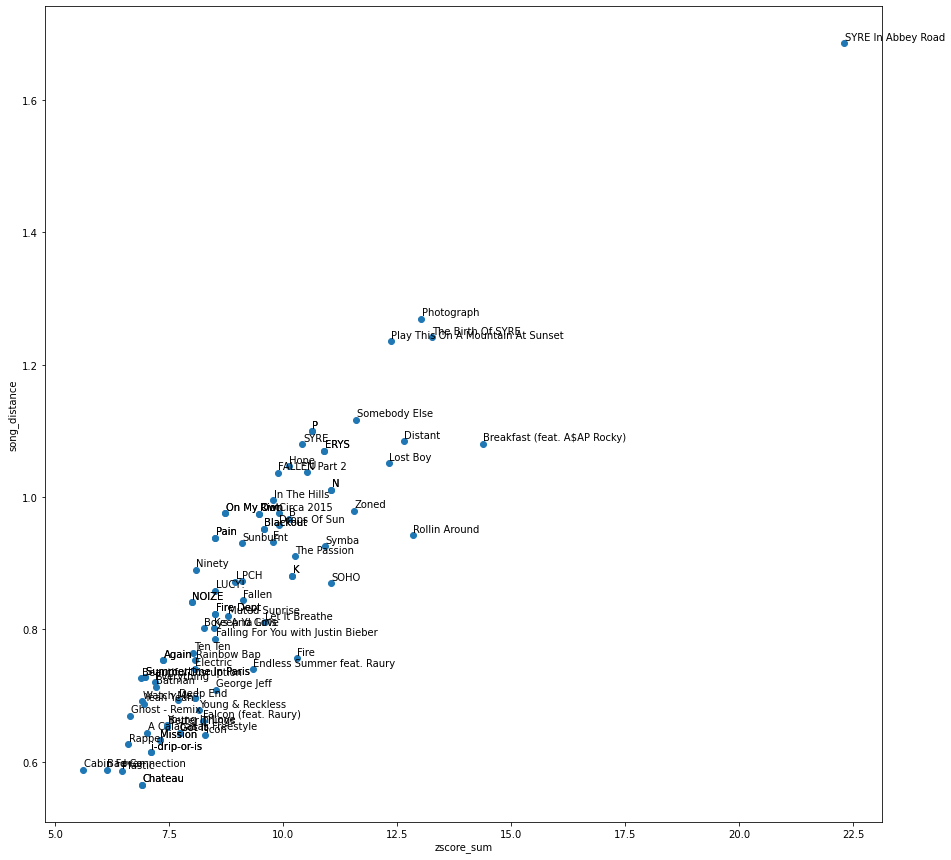

In [120]:
plt.figure(figsize=(15,15))
# Add the point labels
x = music_df_new['zscore_sum']
y = music_df_new['song_distance']
plt.scatter(x, y)
pt_labels = music_df_new['name']
for i in range(len(pt_labels)):
    plt.annotate(pt_labels[i], (x[i]+.01,y[i]+.005))
plt.xlabel('zscore_sum')
plt.ylabel('song_distance');

In [140]:
music_df_new.groupby('name').mean().sort_values(by='test', ascending=True)[:10]

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,zscore_sum,song_distance,test
name,,,,,,,,,
Fair Game,0.772,0.0505,0.700,0.051500,0.1470,0.0454,11.640332,0.657113,11.658865
False Direction,0.680,0.0304,0.584,0.000945,0.1060,0.0617,11.885202,0.790891,11.911488
Run the World!!!,0.706,0.1580,0.631,0.000607,0.0374,0.0553,12.050290,0.708372,12.071092
Hot Rod,0.707,0.0279,0.767,0.000295,0.1690,0.0323,12.451698,0.686617,12.470614
Nicknames,0.752,0.0681,0.531,0.004800,0.2930,0.0369,13.698085,0.755581,13.718908
Listerine,0.694,0.1680,0.583,0.819000,0.3290,0.0371,15.888948,1.096951,15.926769
Can I Call You Tonight?,0.641,0.1320,0.842,0.910000,0.4190,0.0292,16.120810,1.147241,16.161580
Junior Varsity,0.263,0.0835,0.521,0.047400,0.0891,0.0465,16.307872,1.132406,16.347142
Fuzzybrain,0.488,0.0233,0.510,0.150000,0.1430,0.0260,16.892340,0.982291,16.920876
